In [261]:
def CustomParser(data):
    import json
    j1 = json.loads(data)
    return j1

In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
df = pd.read_json('boardgames_100.json')

df.head()
id_to_idx = {} # A useful dictionary for converting between IDs and indices.  
idx_to_id = {}
for i, id in enumerate(df.loc[:,'id']):
    id_to_idx[id] = i
    idx_to_id[i] = id

In [263]:
df['recommendations'] = df['recommendations'].apply(lambda x: x['fans_liked'])

In [264]:
adj_matrix = np.zeros((100,100))

In [265]:
for index in range(100):
    #print(f"{index} : {df.iloc[index]['recommendations']}")
    # Construct the graph
    v = id_to_idx[df.iloc[index]['id']] # Source node
    for endpoint in df.iloc[index]['recommendations']:
        try:
            w = id_to_idx[endpoint] # Sink node
            # Construct a directed edge (v, w)
            adj_matrix[v][w] = 1
        except:
            pass

In [266]:
# Get the categories
df.types = df.types.apply(lambda x: x['categories'])
df.types = df.types.apply(lambda x: [y['name'] for y in x])


In [267]:
type_counts = {}
for t_lst in df.types:
    for t in t_lst:
        if t not in type_counts:
            type_counts[t] = 1
        else:
            type_counts[t] += 1


type_counts = sorted(type_counts.items(), key=lambda x: x[1], reverse=True)
temp = {}

for t in type_counts:
    temp[t[0]] = t[1]
type_counts = temp

In [268]:
def get_most_common_cat(t_lst: list):
    best = t_lst[0]
    for t in t_lst:
        if type_counts[t] > type_counts[best]:
            best = t
    
    return best

In [269]:
cats = list(type_counts.keys())


In [270]:
categories = []
for i in range(len(df.types)):
    if get_most_common_cat(df.types[i]) not in categories:
        categories.append(get_most_common_cat(df.types[i]))

print(len(categories))

14


In [271]:
colors = ["black", "orangered", "darksalmon", "saddlebrown", "darkorange", "greenyellow", "green", "turqoise", "teal", "cyan", "skyblue", "grey", "blue", "violet"]

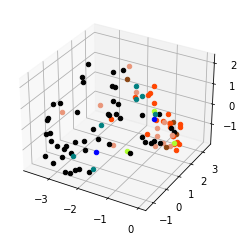

In [272]:
u,s,vt = np.linalg.svd(adj_matrix)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = u[:,0]
y = u[:,1]
z = u[:,2]

for i, datapoint in enumerate(adj_matrix):
    # Represent the datapoint in our new basis consisting of x,y,z
    # AKA, the 3 most significant singular vectors of the data matrix
    xs = np.dot(x, datapoint)
    ys = np.dot(y, datapoint)
    zs = np.dot(z, datapoint)
    try:
        mark_color = colors[cats.index(get_most_common_cat(df.types[i]))]
        ax.scatter(xs, ys, zs,color=mark_color)
    except:
        ax.scatter(xs, ys, zs,color="black")

plt.show()

